Path from A to F: A -> B -> E -> F


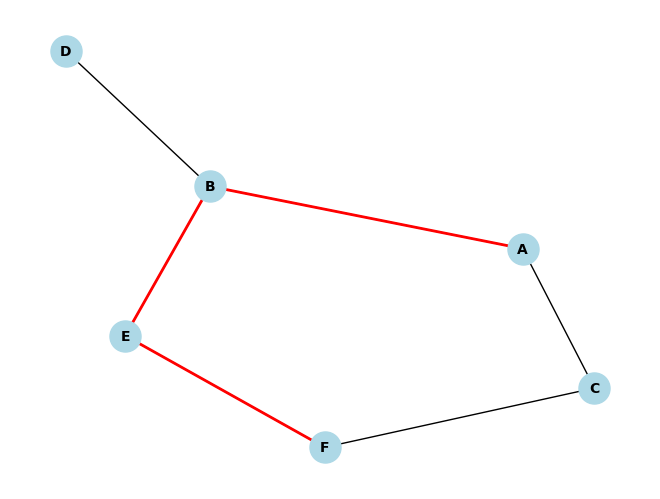

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# DFS implementation to find path from start to destination
def dfs(graph, start, destination, visited=None, path=None):
    if visited is None:
        visited = set()
    if path is None:
        path = []

    visited.add(start)
    path.append(start)

    if start == destination:
        return path

    # Visit neighbors
    for neighbor in graph[start]:
        if neighbor not in visited:
            result = dfs(graph, neighbor, destination, visited, path)
            if result:
                return result

    path.pop()
    return None

# Function to display the graph using matplotlib and networkx
def show_graph(graph, path=None):
    G = nx.Graph()
    for node in graph:
        for neighbor in graph[node]:
            G.add_edge(node, neighbor)
    
    pos = nx.spring_layout(G)  # Layout for visualization
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
    
    # Highlight the path, if exists
    if path:
        edges_in_path = [(path[i], path[i+1]) for i in range(len(path) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color='r', width=2)
    
    plt.show()

# Example graph as an adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# Inputs: Start and destination points
start = input("Enter the starting point: ").upper()
destination = input("Enter the destination point: ").upper()

# Perform DFS to find path
path = dfs(graph, start, destination)

if path:
    print(f"Path from {start} to {destination}: {' -> '.join(path)}")
else:
    print(f"No path found from {start} to {destination}")

# Show graph and the path
show_graph(graph, path)
